# <center> Open Project :<br> <small>Réda DEHAK<br> December, 2022 <br> Deadline:  January 15th 23h59 </small></center>

XGbboost, shap should be installed

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, precision_recall_curve, auc, roc_curve
import xgboost as xgb
import shap
from IPython.display import display

# Part 1:

The dataset for training and testing your methods can be downloaded from the Teams group or on the UCI website https://archive.ics.uci.edu/ml/datasets/Air+Quality. The dataset contains 9358 instances of hourly averaged responses from an array of 5 metal oxide chemical sensors embedded in an Air Quality Chemical Multisensor Device. The device was located on the field in a significantly polluted area, at road level,within an Italian city. Data were recorded from March 2004 to February 2005 (one year)representing the longest freely available recordings of on field deployed air quality chemical sensor devices responses. Ground Truth hourly averaged concentrations for CO, Non Metanic Hydrocarbons, Benzene, Total Nitrogen Oxides (NOx) and Nitrogen Dioxide (NO2) and were provided by a co-located reference certified analyzer. 

### Attributes Information:

    0- Date (DD/MM/YYYY) 
    1- Time (HH.MM.SS) 
    2- True hourly averaged concentration CO in mg/m^3 (reference analyzer) 
    3- PT08.S1 (tin oxide) hourly averaged sensor response (nominally CO targeted) 
    4- True hourly averaged overall Non Metanic HydroCarbons concentration in microg/m^3 (reference analyzer) 
    5- True hourly averaged Benzene concentration in microg/m^3 (reference analyzer) 
    6- PT08.S2 (titania) hourly averaged sensor response (nominally NMHC targeted) 
    7- True hourly averaged NOx concentration in ppb (reference analyzer) 
    8- PT08.S3 (tungsten oxide) hourly averaged sensor response (nominally NOx targeted) 
    9- True hourly averaged NO2 concentration in microg/m^3 (reference analyzer) 
    10- PT08.S4 (tungsten oxide) hourly averaged sensor response (nominally NO2 targeted) 
    11- PT08.S5 (indium oxide) hourly averaged sensor response (nominally O3 targeted) 
    12- Temperature in Â°C 
    13- Relative Humidity (%) 
    14- AH Absolute Humidity 

- Propose a solution to predict the ground truth parameters using the other sensor responses features? 

- Demonstrate that there is a relationship (linear or nolinear) between these parameters?

## Importing, Cleaning & EDA

### Importing

In [2]:
airquality_df=pd.read_csv('Part1data\AirQualityUCI.csv', delimiter=';', decimal=',')
airquality_df.head(10)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN
5,10/03/2004,23.00.00,1.2,1197.0,38.0,4.7,750.0,89.0,1337.0,96.0,1393.0,949.0,11.2,59.2,0.7848,NaN,NaN
6,11/03/2004,00.00.00,1.2,1185.0,31.0,3.6,690.0,62.0,1462.0,77.0,1333.0,733.0,11.3,56.8,0.7603,NaN,NaN
7,11/03/2004,01.00.00,1.0,1136.0,31.0,3.3,672.0,62.0,1453.0,76.0,1333.0,730.0,10.7,60.0,0.7702,NaN,NaN
8,11/03/2004,02.00.00,0.9,1094.0,24.0,2.3,609.0,45.0,1579.0,60.0,1276.0,620.0,10.7,59.7,0.7648,NaN,NaN
9,11/03/2004,03.00.00,0.6,1010.0,19.0,1.7,561.0,-200.0,1705.0,-200.0,1235.0,501.0,10.3,60.2,0.7517,NaN,NaN


In [3]:
airquality_df_2=pd.read_excel('Part1data\AirQualityUCI.xlsx')
airquality_df_2.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [4]:
print(airquality_df.columns)
print(airquality_df_2.columns)

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH', 'Unnamed: 15', 'Unnamed: 16'],
      dtype='object')
Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH'],
      dtype='object')


In [5]:
print(airquality_df.shape)
airquality_df.isnull().sum()
airquality_df.drop(columns=['Unnamed: 15', 'Unnamed: 16'], inplace=True)

(9471, 17)


### Cleaning - Null Values

In [6]:
missing_values = airquality_df.isnull().sum()
rows_with_missing = airquality_df[airquality_df.isnull().any(axis=1)]

rows_with_missing.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
9357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9358,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9359,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9360,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9361,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
rows_with_missing.isnull().sum()

Date             114
Time             114
CO(GT)           114
PT08.S1(CO)      114
NMHC(GT)         114
C6H6(GT)         114
PT08.S2(NMHC)    114
NOx(GT)          114
PT08.S3(NOx)     114
NO2(GT)          114
PT08.S4(NO2)     114
PT08.S5(O3)      114
T                114
RH               114
AH               114
dtype: int64

### Linear Collinearity - Conclusion

Choosing one value among PT08.S1(CO), PT08.S2(NMHC), PT08.S4(NO2) and PT08.S5(O3) and Avoid using others if one is chosen


from C6H6(GT), 'T', 'RH', 'AH' choose one and avoid others

In [8]:
airquality_df.columns

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH'],
      dtype='object')

In [9]:
airquality_df.dropna(inplace=True)
airquality_df.reset_index(drop=True, inplace=True)

### Cleaning - Duplicate Values

In [10]:
duplicate_rows_datetime = airquality_df[airquality_df.duplicated(subset=['Date', 'Time'], keep=False)]
duplicate_rows_datetime.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH


In [11]:
airquality_df['Date']=pd.to_datetime(airquality_df['Date']+' '+airquality_df['Time'], format='%d/%m/%Y %H.%M.%S')
#drop time
airquality_df.drop(columns=['Time'], inplace=True)
airquality_df.head()

,Date,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10 18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,2004-03-10 19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,2004-03-10 20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,2004-03-10 21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,2004-03-10 22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


#### EDA

In [12]:
airquality_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   datetime64[ns]
 1   CO(GT)         9357 non-null   float64       
 2   PT08.S1(CO)    9357 non-null   float64       
 3   NMHC(GT)       9357 non-null   float64       
 4   C6H6(GT)       9357 non-null   float64       
 5   PT08.S2(NMHC)  9357 non-null   float64       
 6   NOx(GT)        9357 non-null   float64       
 7   PT08.S3(NOx)   9357 non-null   float64       
 8   NO2(GT)        9357 non-null   float64       
 9   PT08.S4(NO2)   9357 non-null   float64       
 10  PT08.S5(O3)    9357 non-null   float64       
 11  T              9357 non-null   float64       
 12  RH             9357 non-null   float64       
 13  AH             9357 non-null   float64       
dtypes: datetime64[ns](1), float64(13)
memory usage: 1023.6 KB


In [13]:
scaler=StandardScaler()
airquality_df_standarized=airquality_df.drop(columns=['Date'])
data_standarized=scaler.fit_transform(airquality_df_standarized)

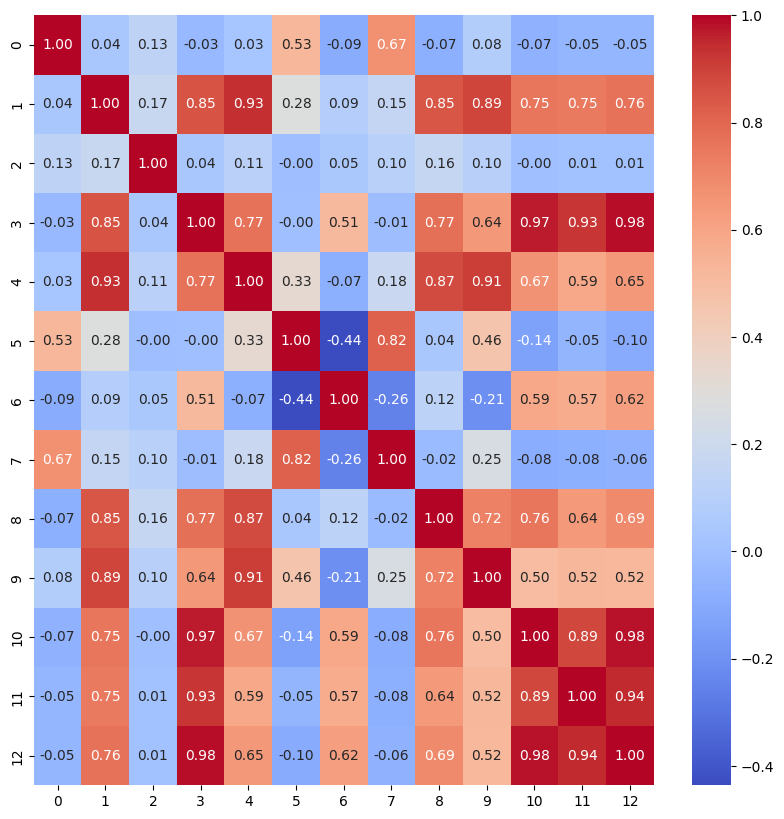

In [14]:
plt.figure(figsize=(10,10))
corr = np.corrcoef(data_standarized.T)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")

plt.show()

Linear Correlation seems to be evident between:

PT08.S2(NMHC) - PT08.S1(CO)

PT08.S4(NO2) - PT08.S1(CO)

PT08.S5(O3) - PT08.S1(CO)

C6H6(GT) - T, RH & AH

PT08.S4(NO2) - PT08.S2(NMHC)
 
PT08.S5(O3) - 	PT08.S2(NMHC)	

NOx(GT) - NO2(GT)

RH - AH 


### Cleaning unrealistic Negative Values

In [15]:
columns_to_convert=['CO(GT)', 'C6H6(GT)', 'T', 'RH', 'AH', 'PT08.S1(CO)', 'PT08.S2(NMHC)', 'PT08.S4(NO2)', 'PT08.S5(O3)']
thresholds = {col: 0 for col in columns_to_convert}
for col, threshold in thresholds.items():
    airquality_df = airquality_df[airquality_df[col] >= threshold]

### Plotting

#### Pair Plots

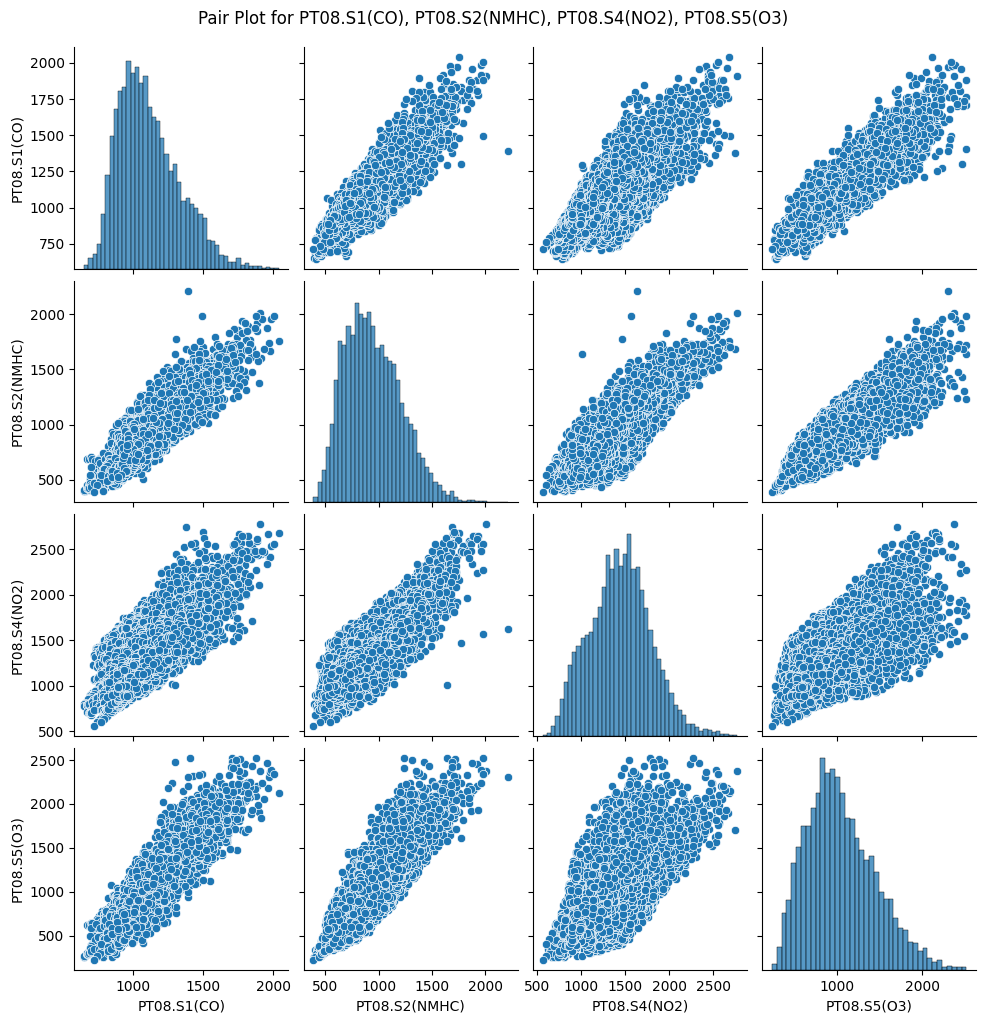

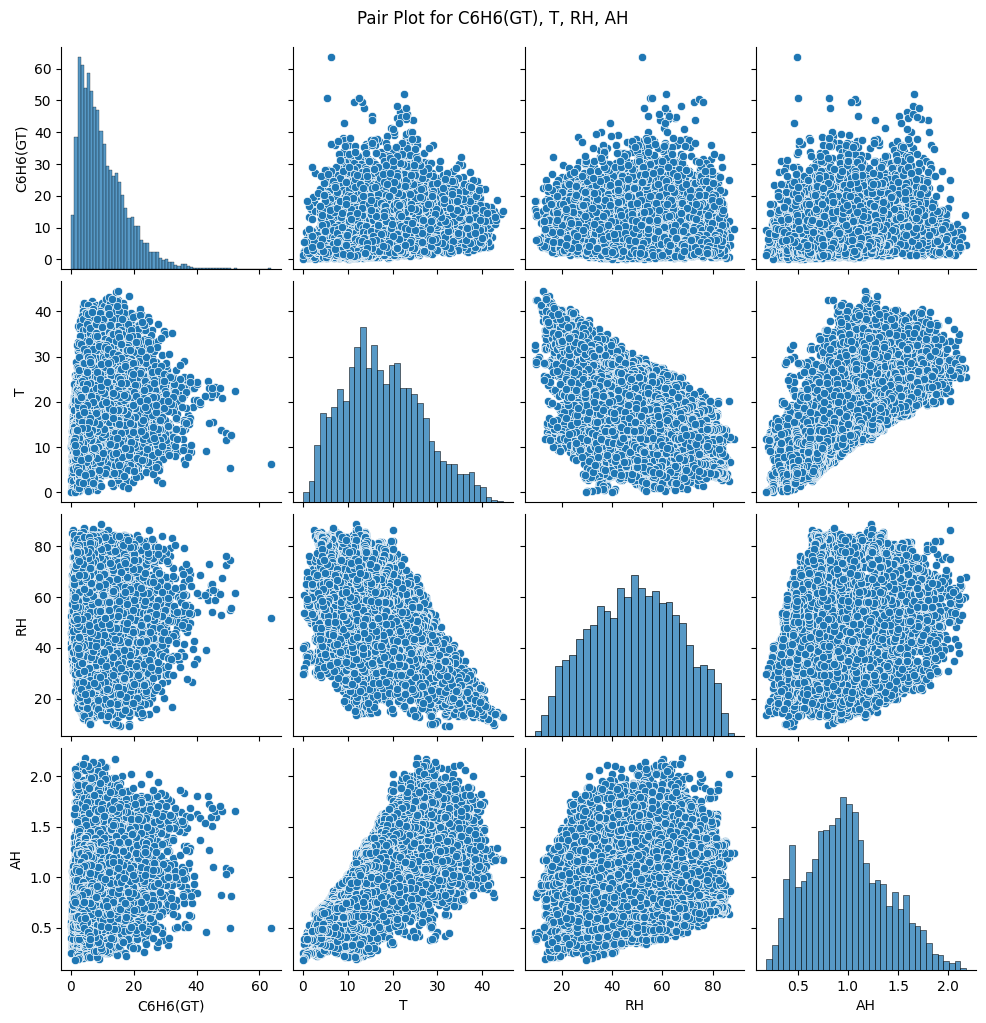

In [16]:
sns.pairplot(airquality_df[['PT08.S1(CO)', 'PT08.S2(NMHC)', 'PT08.S4(NO2)', 'PT08.S5(O3)']])
plt.suptitle('Pair Plot for PT08.S1(CO), PT08.S2(NMHC), PT08.S4(NO2), PT08.S5(O3)', y=1.02)
plt.show()

# Pair plot for the second set of variables
sns.pairplot(airquality_df[['C6H6(GT)', 'T', 'RH', 'AH']])
plt.suptitle('Pair Plot for C6H6(GT), T, RH, AH', y=1.02)
plt.show()

#### Scatter Plots

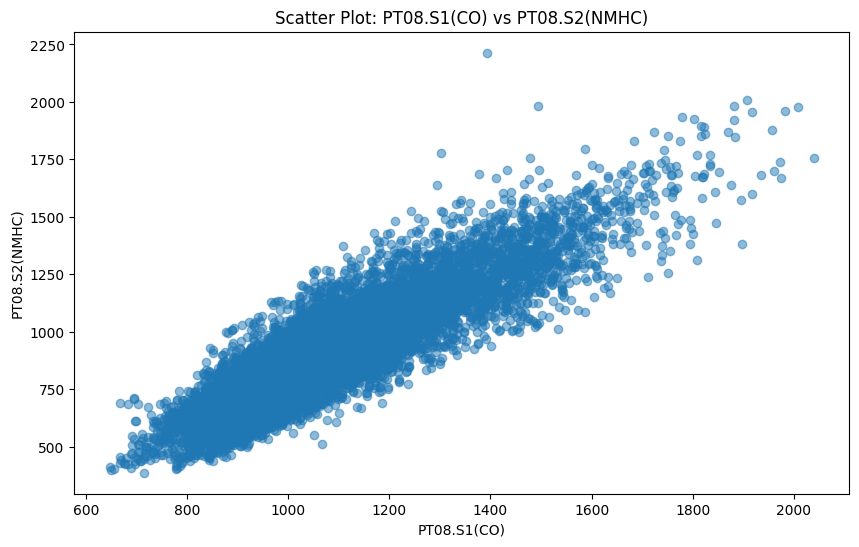

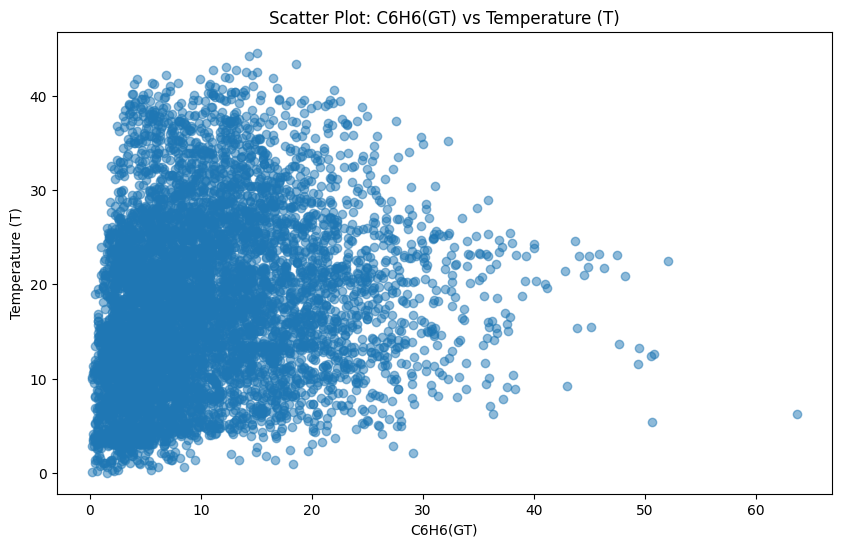

In [17]:
plt.figure(figsize=(10, 6))
plt.scatter(airquality_df['PT08.S1(CO)'], airquality_df['PT08.S2(NMHC)'], alpha=0.5)
plt.title('Scatter Plot: PT08.S1(CO) vs PT08.S2(NMHC)')
plt.xlabel('PT08.S1(CO)')
plt.ylabel('PT08.S2(NMHC)')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(airquality_df['C6H6(GT)'], airquality_df['T'], alpha=0.5)
plt.title('Scatter Plot: C6H6(GT) vs Temperature (T)')
plt.xlabel('C6H6(GT)')
plt.ylabel('Temperature (T)')
plt.show()


## Conslusion 

Sensors PT08.S1(CO), PT08.S2(NMHC), PT08.S4(NO2), and PT08.S5(O3) exhibit strong positive linear correlations with each other.


C6H6(GT) does not show strong linear relationships with T, RH, or AH. This indicates that the variability in Benzene concentration is not directly explained by these variables alone.

## Preform PCA

### Eigen Values & Eigen Vectors

[6.58480575e+00 2.94483224e+00 1.40883018e+00 1.03229100e+00
 3.93752126e-01 2.50741673e-01 1.31569400e-01 1.05677604e-01
 7.65036565e-02 3.98065276e-02 2.82183454e-02 2.60799713e-03
 3.63504421e-04]
13


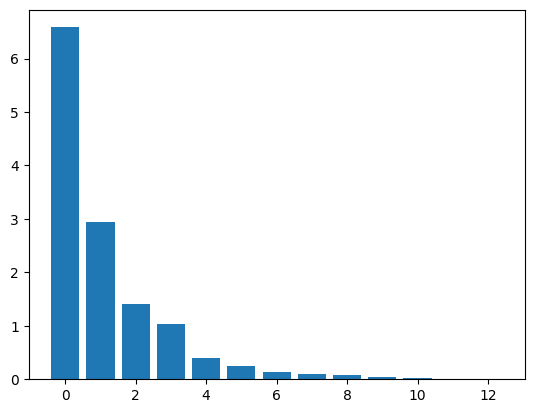

In [18]:
eigenvalues, eigenvectors=np.linalg.eig(corr)

idx=eigenvalues.argsort()[::-1]
eigenvalues=eigenvalues[idx]
eigenvectors=eigenvectors[:, idx]

print(eigenvalues)
print(len(eigenvalues))
plt.bar(idx,eigenvalues)
plt.show()

In [19]:
top_k = 4
top_eigenvalues = eigenvalues[:top_k]
top_eigenvectors = eigenvectors[:, :top_k]

print("Top Eigenvalues:", top_eigenvalues)

data_columns = airquality_df_standarized.columns.tolist()

# Determine the significant original columns for each top eigenvector
for i in range(top_k):
    eigenvector = top_eigenvectors[:, i]
    significant_columns_idx = np.argsort(np.abs(eigenvector))[::-1]
    significant_columns = [data_columns[j] for j in significant_columns_idx]
    print(f"Significant Columns (sorted by contribution): {significant_columns[0]}")


Top Eigenvalues: [6.58480575 2.94483224 1.40883018 1.032291  ]
Significant Columns (sorted by contribution): C6H6(GT)
Significant Columns (sorted by contribution): NOx(GT)
Significant Columns (sorted by contribution): CO(GT)
Significant Columns (sorted by contribution): NMHC(GT)


## Conclusion

The Ground truth element hold the most importance

# Spotting Prediction between features

Define Linear Models and do evaluation.

The features that are high collerated:
1. PT08.S2(NMHC) and PT08.S1(CO)
2. PT08.S4(NO2) and PT08.S1(CO)
3. PT08.S5(O3) and PT08.S1(CO)
4. C6H6(GT), T, RH, and AH
5. NOx(GT) and NO2(GT)

In [20]:
def evaluate_regression_models(X, y, test_size=0.2, random_state=42, target_variable=None):
    if X.ndim == 1:
        X_train, X_test, y_train, y_test = train_test_split(X.values.reshape(-1, 1), y, test_size=test_size, random_state=random_state)
    else:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
        
    models_eval = {}
    models = {
        'Linear Regression': LinearRegression(),
        'Decision Tree': DecisionTreeRegressor(),
        'Random Forest': RandomForestRegressor(),
        'Elastic Net': ElasticNet(),
    }
    
    if target_variable == 'CO(GT)':
        models['SVR'] = SVR(kernel='linear')#used the rbf kernel
    
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        
        # Predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Evaluation Metrics
        train_mse = mean_squared_error(y_train, y_train_pred)
        test_mse = mean_squared_error(y_test, y_test_pred)
        train_rmse = np.sqrt(train_mse)
        test_rmse = np.sqrt(test_mse)
        train_mae = mean_absolute_error(y_train, y_train_pred)
        test_mae = mean_absolute_error(y_test, y_test_pred)
        train_r2 = r2_score(y_train, y_train_pred)
        test_r2 = r2_score(y_test, y_test_pred)
        train_adjusted_r2 = 1 - (1 - train_r2) * (len(y_train) - 1) / (len(y_train) - X_train.shape[1])
        test_adjusted_r2 = 1 - (1 - test_r2) * (len(y_test) - 1) / (len(y_test) - X_train.shape[1])

        models_eval[model_name] = {
            "Train Mean Absolute Error": train_mae,
            "Test Mean Absolute Error": test_mae,
            "Train Mean Squared Error": train_mse,
            "Test Mean Squared Error": test_mse,
            "Train Root Mean Squared Error": train_rmse,
            "Test Root Mean Squared Error": test_rmse,
            "Train R-squared": train_r2,
            "Test R-squared": test_r2,
            "Train Adjusted R-squared": train_adjusted_r2,
            "Test Adjusted R-squared": test_adjusted_r2
        }

    return models_eval

In [21]:
features_training = {
    'PT08.S2(NMHC) and PT08.S1(CO)': {
        'X': airquality_df['PT08.S2(NMHC)'],
        'y': airquality_df['PT08.S1(CO)']
    },
    'PT08.S4(NO2) and PT08.S1(CO)': {
        'X': airquality_df['PT08.S4(NO2)'],
        'y': airquality_df['PT08.S1(CO)']
    },
    'PT08.S5(O3) and PT08.S1(CO)': {
        'X': airquality_df['PT08.S5(O3)'],
        'y': airquality_df['PT08.S1(CO)']
    },
    'C6H6(GT) and T': {
        'X': airquality_df['C6H6(GT)'],
        'y': airquality_df['T']
    },
    'C6H6(GT) and RH': {
        'X': airquality_df['C6H6(GT)'],
        'y': airquality_df['RH']
    },
    'C6H6(GT) and AH': {
        'X': airquality_df['C6H6(GT)'],
        'y': airquality_df['AH']
    },
    'NOx(GT) and NO2(GT)': {
        'X': airquality_df['NOx(GT)'],
        'y': airquality_df['NO2(GT)']
    }
}

# Evaluate models for each feature pair and store results in a dictionary
evaluation_results = {}
for pair_name, data in features_training.items():
    X = data['X']
    y = data['y']
    evaluation_results[pair_name] = evaluate_regression_models(X, y)

results_df = pd.DataFrame()
for pair_name, metrics in evaluation_results.items():
    pair_results = pd.DataFrame(metrics).T
    pair_results['Feature Pair'] = pair_name
    results_df = pd.concat([results_df, pair_results])

results_df.reset_index(inplace=True)
results_df.rename(columns={'index': 'Model'}, inplace=True)

results_df = results_df[['Feature Pair', 'Model', 'Train Mean Absolute Error', 
    'Test Mean Absolute Error', 'Train Mean Squared Error', 'Test Mean Squared Error', 
    'Train Root Mean Squared Error', 'Test Root Mean Squared Error', 'Train R-squared', 
    'Test R-squared', 'Train Adjusted R-squared', 'Test Adjusted R-squared'
]]
#Display results by Pair
for feature_pair in results_df['Feature Pair'].unique():
    subset_df = results_df[results_df['Feature Pair'] == feature_pair]
    display(subset_df)

,Feature Pair,Model,Train Mean Absolute Error,Test Mean Absolute Error,Train Mean Squared Error,Test Mean Squared Error,Train Root Mean Squared Error,Test Root Mean Squared Error,Train R-squared,Test R-squared,Train Adjusted R-squared,Test Adjusted R-squared
0,PT08.S2(NMHC) and PT08.S1(CO),Linear Regression,78.600453,82.072521,9899.064737,10828.186845,99.494044,104.058574,0.789683,0.784991,0.789683,0.784991
1,PT08.S2(NMHC) and PT08.S1(CO),Decision Tree,67.919136,91.891025,7689.189957,14073.950736,87.688026,118.633683,0.836634,0.720542,0.836634,0.720542
2,PT08.S2(NMHC) and PT08.S1(CO),Random Forest,69.566469,89.546278,7849.090913,13187.877469,88.595095,114.838484,0.833237,0.738137,0.833237,0.738137
3,PT08.S2(NMHC) and PT08.S1(CO),Elastic Net,78.600461,82.072658,9899.064748,10828.211907,99.494044,104.058695,0.789683,0.784991,0.789683,0.784991


,Feature Pair,Model,Train Mean Absolute Error,Test Mean Absolute Error,Train Mean Squared Error,Test Mean Squared Error,Train Root Mean Squared Error,Test Root Mean Squared Error,Train R-squared,Test R-squared,Train Adjusted R-squared,Test Adjusted R-squared
4,PT08.S4(NO2) and PT08.S1(CO),Linear Regression,132.500771,137.108208,25864.813389,27205.598051,160.825413,164.941196,0.450471,0.459795,0.450471,0.459795
5,PT08.S4(NO2) and PT08.S1(CO),Decision Tree,105.227122,146.672751,18763.052532,34038.200729,136.978292,184.494446,0.601357,0.324125,0.601357,0.324125
6,PT08.S4(NO2) and PT08.S1(CO),Random Forest,108.074701,143.057052,19069.034376,32149.425011,138.090674,179.302607,0.594856,0.361629,0.594856,0.361629
7,PT08.S4(NO2) and PT08.S1(CO),Elastic Net,132.500575,137.108109,25864.813393,27205.621807,160.825413,164.941268,0.450471,0.459795,0.450471,0.459795


,Feature Pair,Model,Train Mean Absolute Error,Test Mean Absolute Error,Train Mean Squared Error,Test Mean Squared Error,Train Root Mean Squared Error,Test Root Mean Squared Error,Train R-squared,Test R-squared,Train Adjusted R-squared,Test Adjusted R-squared
8,PT08.S5(O3) and PT08.S1(CO),Linear Regression,74.385542,79.482116,9014.458338,10103.848922,94.944501,100.517903,0.808477,0.799374,0.808477,0.799374
9,PT08.S5(O3) and PT08.S1(CO),Decision Tree,58.788940,89.468037,5943.872363,13703.969744,77.096513,117.063956,0.873715,0.727889,0.873715,0.727889
10,PT08.S5(O3) and PT08.S1(CO),Random Forest,61.920636,86.143177,6215.052501,12396.844517,78.835604,111.341118,0.867954,0.753844,0.867954,0.753844
11,PT08.S5(O3) and PT08.S1(CO),Elastic Net,74.385514,79.482137,9014.458341,10103.870484,94.944501,100.518011,0.808477,0.799374,0.808477,0.799374


,Feature Pair,Model,Train Mean Absolute Error,Test Mean Absolute Error,Train Mean Squared Error,Test Mean Squared Error,Train Root Mean Squared Error,Test Root Mean Squared Error,Train R-squared,Test R-squared,Train Adjusted R-squared,Test Adjusted R-squared
12,C6H6(GT) and T,Linear Regression,7.150640,6.796320,76.877913,69.393423,8.768005,8.330271,0.036666,0.026464,0.036666,0.026464
13,C6H6(GT) and T,Decision Tree,6.646990,6.862771,67.777685,71.439444,8.232720,8.452186,0.150698,-0.002240,0.150698,-0.002240
14,C6H6(GT) and T,Random Forest,6.673181,6.829129,67.911194,70.837357,8.240825,8.416493,0.149025,0.006206,0.149025,0.006206
15,C6H6(GT) and T,Elastic Net,7.152758,6.795303,76.884700,69.344473,8.768392,8.327333,0.036581,0.027150,0.036581,0.027150


,Feature Pair,Model,Train Mean Absolute Error,Test Mean Absolute Error,Train Mean Squared Error,Test Mean Squared Error,Train Root Mean Squared Error,Test Root Mean Squared Error,Train R-squared,Test R-squared,Train Adjusted R-squared,Test Adjusted R-squared
16,C6H6(GT) and RH,Linear Regression,14.694139,14.212346,307.203539,293.720809,17.527223,17.138285,0.001627,-0.000480,0.001627,-0.000480
17,C6H6(GT) and RH,Decision Tree,13.766174,14.578171,279.773115,308.257029,16.726420,17.557250,0.090773,-0.049993,0.090773,-0.049993
18,C6H6(GT) and RH,Random Forest,13.820107,14.539660,280.255203,306.699482,16.740824,17.512838,0.089206,-0.044688,0.089206,-0.044688
19,C6H6(GT) and RH,Elastic Net,14.692893,14.209930,307.208915,293.670443,17.527376,17.136815,0.001610,-0.000308,0.001610,-0.000308


,Feature Pair,Model,Train Mean Absolute Error,Test Mean Absolute Error,Train Mean Squared Error,Test Mean Squared Error,Train Root Mean Squared Error,Test Root Mean Squared Error,Train R-squared,Test R-squared,Train Adjusted R-squared,Test Adjusted R-squared
20,C6H6(GT) and AH,Linear Regression,0.318681,0.317231,0.154387,0.154997,0.392921,0.393696,0.031188,0.022328,0.031188,0.022328
21,C6H6(GT) and AH,Decision Tree,0.301950,0.324487,0.142209,0.163081,0.377107,0.403833,0.107603,-0.028664,0.107603,-0.028664
22,C6H6(GT) and AH,Random Forest,0.303695,0.321642,0.142692,0.160038,0.377746,0.400048,0.104572,-0.009473,0.104572,-0.009473
23,C6H6(GT) and AH,Elastic Net,0.323170,0.319327,0.158951,0.158547,0.398687,0.398180,0.002546,-0.000065,0.002546,-0.000065


,Feature Pair,Model,Train Mean Absolute Error,Test Mean Absolute Error,Train Mean Squared Error,Test Mean Squared Error,Train Root Mean Squared Error,Test Root Mean Squared Error,Train R-squared,Test R-squared,Train Adjusted R-squared,Test Adjusted R-squared
24,NOx(GT) and NO2(GT),Linear Regression,38.656325,38.235870,3233.715230,3225.110069,56.865765,56.790053,0.549673,0.567378,0.549673,0.567378
25,NOx(GT) and NO2(GT),Decision Tree,16.317487,20.881962,555.413854,922.987935,23.567220,30.380716,0.922653,0.876189,0.922653,0.876189
26,NOx(GT) and NO2(GT),Random Forest,16.805886,20.503559,567.494915,878.322831,23.822152,29.636512,0.920971,0.882180,0.920971,0.882180
27,NOx(GT) and NO2(GT),Elastic Net,38.655704,38.235374,3233.715238,3225.128480,56.865765,56.790215,0.549673,0.567376,0.549673,0.567376


The features that are high collerated:
1. PT08.S2(NMHC) and PT08.S1(CO) - Linear Regression is enough
2. PT08.S4(NO2) and PT08.S1(CO) - Linear Regression preforms well but different algorithm needs to be in place
3. PT08.S5(O3) and PT08.S1(CO) - Linear Regression preforms best
4. C6H6(GT), T, RH, and AH - Elastic Net proves good results except for linear regression for AH 
5. NOx(GT) and NO2(GT) - The relation is more compex and Random Forest preformed the best considering the values for the test data



## Predicting Ground Truth

In [22]:
ground_truth_vars = ['CO(GT)', 'NMHC(GT)', 'C6H6(GT)']

# Evaluate models for each ground truth variable
results = []
for target in ground_truth_vars:
    predictors = airquality_df.drop(columns=ground_truth_vars + ['Date']) # Drop ground truth variables and Date
    target_data = airquality_df[target]
    
    evaluation = evaluate_regression_models(predictors, target_data, target_variable=target)
    
    for model, metrics in evaluation.items():
        results.append({
            'Ground Truth': target,
            'Model': model,
            **metrics
        })

# Convert results to DataFrame
results_df_pred = pd.DataFrame(results)

results_df_pred

,Ground Truth,Model,Train Mean Absolute Error,Test Mean Absolute Error,Train Mean Squared Error,Test Mean Squared Error,Train Root Mean Squared Error,Test Root Mean Squared Error,Train R-squared,Test R-squared,Train Adjusted R-squared,Test Adjusted R-squared
0,CO(GT),Linear Regression,2.994856e-01,0.313461,2.086143e-01,0.215351,4.567431e-01,0.464059,0.896893,0.902938,0.896734,0.902338
1,CO(GT),Decision Tree,9.479014e-18,0.343490,2.921897e-33,0.277921,5.405457e-17,0.527182,1.000000,0.874736,1.000000,0.873963
2,CO(GT),Random Forest,9.095413e-02,0.253113,2.270538e-02,0.153308,1.506831e-01,0.391546,0.988778,0.930901,0.988761,0.930475
3,CO(GT),Elastic Net,3.091850e-01,0.323692,2.205423e-01,0.229150,4.696193e-01,0.478696,0.890998,0.896718,0.890830,0.896080
4,CO(GT),SVR,5.189139e-01,0.501829,5.501751e-01,0.466422,7.417379e-01,0.682951,0.728077,0.789776,0.727659,0.788477
5,NMHC(GT),Linear Regression,7.266715e+01,78.387604,1.253576e+04,16067.282282,1.119632e+02,126.756784,0.451949,0.402968,0.451107,0.399280
6,NMHC(GT),Decision Tree,0.000000e+00,29.961827,0.000000e+00,16362.871166,0.000000e+00,127.917439,1.000000,0.391984,1.000000,0.388228
7,NMHC(GT),Random Forest,9.693228e+00,30.561820,8.754846e+02,9542.241093,2.958859e+01,97.684395,0.961725,0.645427,0.961666,0.643237
8,NMHC(GT),Elastic Net,7.319835e+01,78.119812,1.284628e+04,16360.588375,1.133414e+02,127.908516,0.438373,0.392069,0.437510,0.388314
9,C6H6(GT),Linear Regression,7.977713e-01,0.811446,1.285563e+00,1.276131,1.133827e+00,1.129660,0.976547,0.977755,0.976511,0.977617


### Conclusion

this is a model judged from the ground truth being predicted by all the other features except Date:
1. CO: Random Forest is best choice showing mild overfitting. Linear Regression are just generalisation.
2. NMHC(GT): this could be predicted using Elastic net avoiding overfitting shown in Random Forest
3. C6H6(GT): Linear Regression performs best. Random Forest shows really high performance but overfitting is clear 

# Part 2:

The dataset for training and testing your methods can be downloaded from the Teams group. The goal of this dataset is to classify people described by a set of attributes as good or bad credit risks. you will find two files:

    - data.txt: provides the examples with the last column for class category (1 or 2)
    - readme.data.txt: describes the information regarding this dataset
    
    1- Propose two differents methods to solve this problem, you should compare the performance of the classification. you must show all the experiments that you have made.

    2- Propose a solution to improve the resulting performances.

In [23]:
path1 = r'Part2data\data.txt'

data = pd.read_table(path1, delim_whitespace=True, header=None)

column_chosen = ['Status', 'Duration in Month', 'Credit history', 'Purpose', 'Credit amount', 'Savings account/bonds', 'Present employment',
                'Installment rate in percentage of disposable income', 'Personal status', 'Other debtors / guarantors', 'Present residence',
                'Property', 'Age', 'Other installment plans', 'Housing', 'Number of existing credits at this bank', 'Job', 'Telephone',
                'Foreign worker']

rename_cols=[f'col{i}' for i in range(25)]
data = data.rename(columns=dict(zip(data.columns, rename_cols)))
data.head()

C:\Users\SADEK COMPUTER\AppData\Local\Temp\ipykernel_41760\4280951490.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_table is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_table(path1, delim_whitespace=True, header=None)


,col0,col1,col2,col3,col4,col5,col6,col7,col8,col9,...,col15,col16,col17,col18,col19,col20,col21,col22,col23,col24
0,1,6,4,12,5,5,3,4,1,67,...,0,0,1,0,0,1,0,0,1,1
1,2,48,2,60,1,3,2,2,1,22,...,0,0,1,0,0,1,0,0,1,2
2,4,12,4,21,1,4,3,3,1,49,...,0,0,1,0,0,1,0,1,0,1
3,1,42,2,79,1,4,3,4,2,45,...,0,0,0,0,0,0,0,0,1,1
4,1,24,3,49,1,3,3,4,4,53,...,1,0,1,0,0,0,0,0,1,2


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   col0    800 non-null    int64
 1   col1    800 non-null    int64
 2   col2    800 non-null    int64
 3   col3    800 non-null    int64
 4   col4    800 non-null    int64
 5   col5    800 non-null    int64
 6   col6    800 non-null    int64
 7   col7    800 non-null    int64
 8   col8    800 non-null    int64
 9   col9    800 non-null    int64
 10  col10   800 non-null    int64
 11  col11   800 non-null    int64
 12  col12   800 non-null    int64
 13  col13   800 non-null    int64
 14  col14   800 non-null    int64
 15  col15   800 non-null    int64
 16  col16   800 non-null    int64
 17  col17   800 non-null    int64
 18  col18   800 non-null    int64
 19  col19   800 non-null    int64
 20  col20   800 non-null    int64
 21  col21   800 non-null    int64
 22  col22   800 non-null    int64
 23  col23   800 non

In [25]:
for i in range(25):
  sorted_data = sorted(data[f'col{i}'].unique())
  print(f'col{i} has {sorted_data}')

col0 has [1, 2, 3, 4]
col1 has [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 20, 21, 22, 24, 26, 27, 28, 30, 33, 36, 39, 40, 42, 45, 47, 48, 54, 60, 72]
col2 has [0, 1, 2, 3, 4]
col3 has [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 83, 85, 86, 89, 90, 91, 92, 94, 96, 99, 100, 101, 102, 104, 106, 107, 110, 111, 113, 116, 118, 119, 120, 122, 124, 126, 127, 130, 138, 140, 142, 143, 144, 146, 148, 157, 159]
col4 has [1, 2, 3, 4, 5]
col5 has [1, 2, 3, 4, 5]
col6 has [1, 2, 3, 4]
col7 has [1, 2, 3, 4]
col8 has [1, 2, 3, 4]
col9 has [19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68

### Marking the distribution

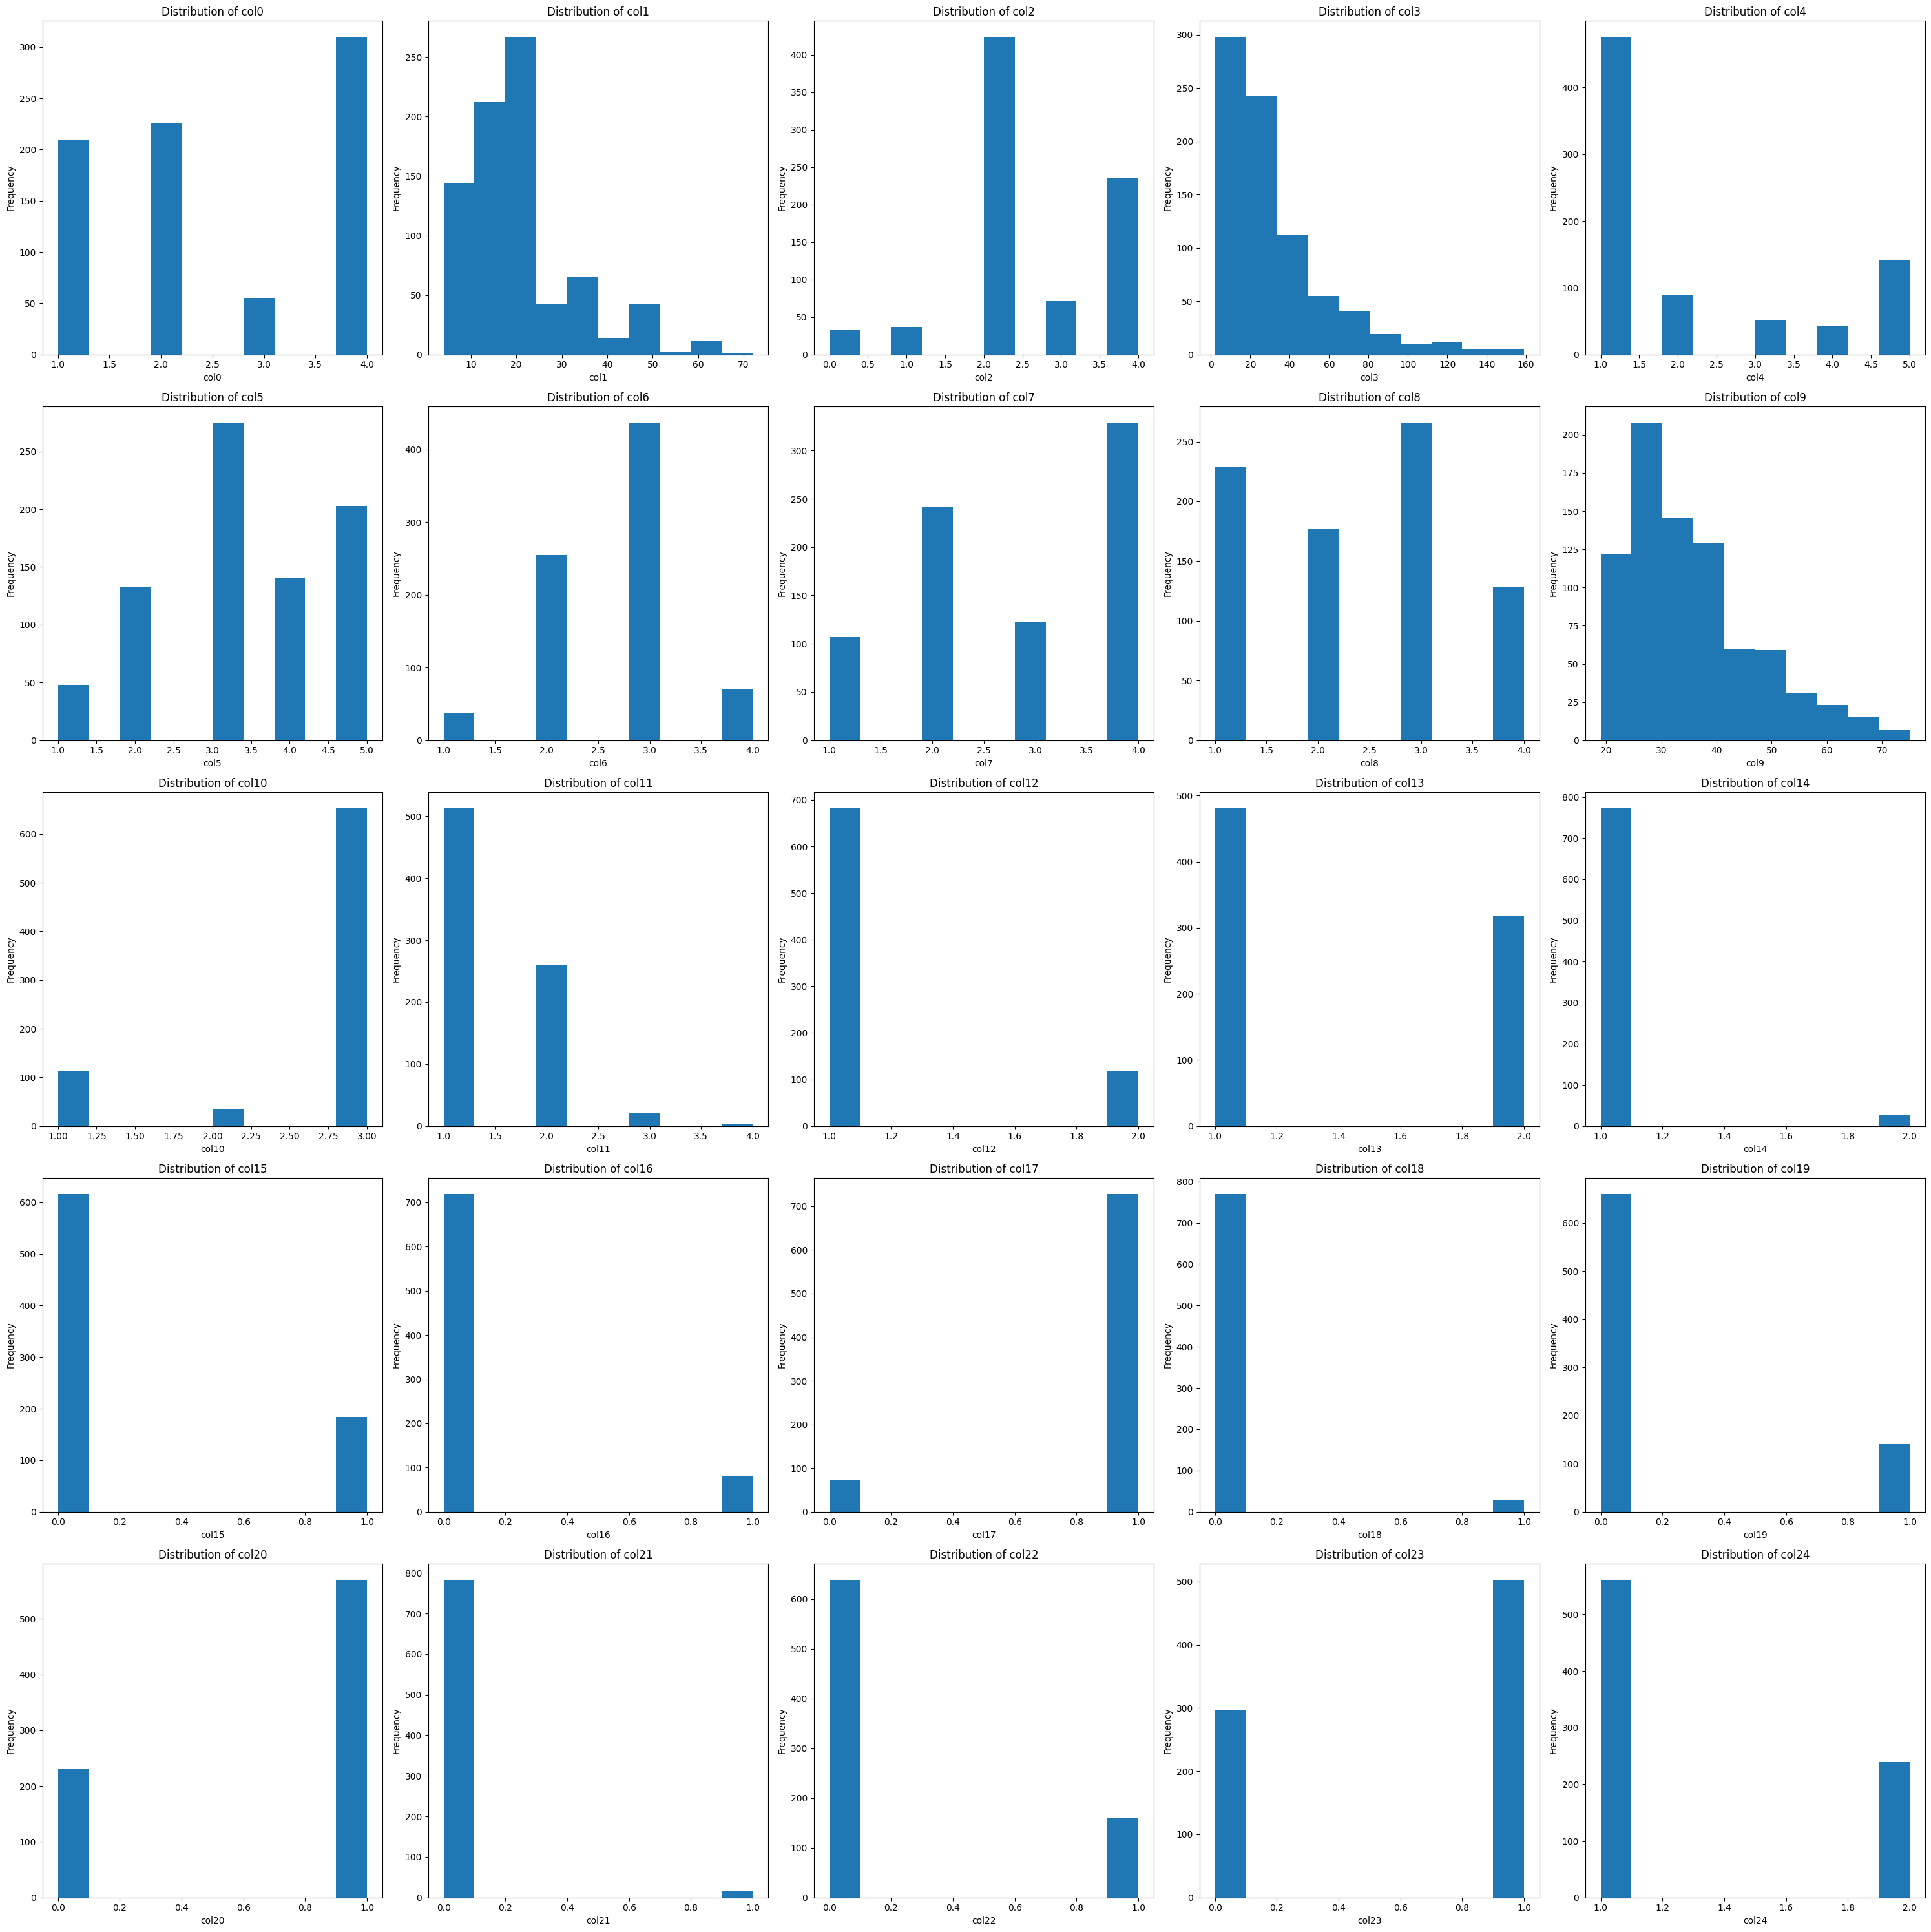

In [26]:
columns_to_plot=[f'col{i}' for i in range(25)]
fig, axes = plt.subplots(nrows=5,ncols=5, figsize=(30, 30))

for col, ax in zip(columns_to_plot, axes.flat):
    ax.hist(data[col])
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
    ax.set_title(f'Distribution of {col}')

# Adjust layout (optional)
plt.tight_layout()  # Adjust spacing between subplots

plt.show()


In [27]:
"""
column_chosen = ['Duration in Month', 'Housing']
"""

replacement_dict={
    'Age': 'col9', # seems logical goes from 19 older 
    'Personal Status': 'col15', # boolean (married or Single)
    'Other installment plans': 'col24', # boolean
    'Foreign Worker': 'col21', # boolean - assuming many are locals
    'Telephone': 'col17',#boolean 22 was chosen firs but 17 was chosen since high number should have telephone
    'Present Employment': 'col20',#boolean 23 before
    'Present Residence': 'col16',#boolean 20 before assuming most come for housing plans
    'Other debtors / guarantors': 'col22', #boolean
    'Property': 'col7',
    'Credit history': 'col4' ,#17, wither good, bad or no which is high good
    'Status': 'col23', #approved or disapproved 18 before - chose 23 for balancing the machine learning algorithms
    
    'Job': 'col2', #since if he doesn't have a present employment can be 0
    'Housing': 'col0',# some aren't that popular
    'Purpose': 'col6', # since most are either for cars - properties
    'Installment rate in percentage of disposable income': 'col1', #it won't go out of 100
    'Duration in Month': 'col8',# doesn't exceeds 5 - previously 4
    'Credit amount': 'col3', # since it can exceeds 100

    'Number of existing Credits at this bank': 'col11', # seems logical - previously 6
    'Savings account/bonds': 'col14', #both beneficial for the bank 1 or 2 - 24 previously
}

In [28]:
replacement_dict = {v: k for k, v in replacement_dict.items()}
data.rename(columns=replacement_dict, inplace=True)

new_column_names = []
for i in range(data.shape[1]):
    new_column_names.append(replacement_dict.get(f'col{i}', f'Column_{i}'))

# Assign the new column names to the dataframe
data.columns = new_column_names

data.head()

,Housing,Installment rate in percentage of disposable income,Job,Credit amount,Credit history,Column_5,Purpose,Property,Duration in Month,Age,...,Personal Status,Present Residence,Telephone,Column_18,Column_19,Present Employment,Foreign Worker,Other debtors / guarantors,Status,Other installment plans
0,1,6,4,12,5,5,3,4,1,67,...,0,0,1,0,0,1,0,0,1,1
1,2,48,2,60,1,3,2,2,1,22,...,0,0,1,0,0,1,0,0,1,2
2,4,12,4,21,1,4,3,3,1,49,...,0,0,1,0,0,1,0,1,0,1
3,1,42,2,79,1,4,3,4,2,45,...,0,0,0,0,0,0,0,0,1,1
4,1,24,3,49,1,3,3,4,4,53,...,1,0,1,0,0,0,0,0,1,2


In [29]:
data.columns

Index(['Housing', 'Installment rate in percentage of disposable income', 'Job',
       'Credit amount', 'Credit history', 'Column_5', 'Purpose', 'Property',
       'Duration in Month', 'Age', 'Column_10',
       'Number of existing Credits at this bank', 'Column_12', 'Column_13',
       'Savings account/bonds', 'Personal Status', 'Present Residence',
       'Telephone', 'Column_18', 'Column_19', 'Present Employment',
       'Foreign Worker', 'Other debtors / guarantors', 'Status',
       'Other installment plans'],
      dtype='object')

## First Method:

We assume we took status as y variable target showing whether it is approved or not 

We will take 2 different machine learning algorithms 

In [30]:
#the chosen y is status
y=data['Status']
X=data.drop('Status', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


### Train Models

In [31]:
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)

random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)

RandomForestClassifier()

In [32]:
logistic_accuracy = accuracy_score(y_test, logistic_model.predict(X_test))
logistic_precision = precision_score(y_test, logistic_model.predict(X_test))
logistic_recall = recall_score(y_test, logistic_model.predict(X_test))
logistic_f1 = f1_score(y_test, logistic_model.predict(X_test))

print("Logistic Regression:")
print(f"Accuracy: {logistic_accuracy:.4f}")
print(f"Precision: {logistic_precision:.4f}")
print(f"Recall: {logistic_recall:.4f}")
print(f"F1-score: {logistic_f1:.4f}")

Logistic Regression:
Accuracy: 0.8333
Precision: 0.8391
Recall: 0.9241
F1-score: 0.8795


In [33]:
random_forest_accuracy = accuracy_score(y_test, random_forest_model.predict(X_test))
random_forest_precision = precision_score(y_test, random_forest_model.predict(X_test))
random_forest_recall = recall_score(y_test, random_forest_model.predict(X_test))
random_forest_f1 = f1_score(y_test, random_forest_model.predict(X_test))

print("\nRandom Forest:")
print(f"Accuracy: {random_forest_accuracy:.4f}")
print(f"Precision: {random_forest_precision:.4f}")
print(f"Recall: {random_forest_recall:.4f}")
print(f"F1-score: {random_forest_f1:.4f}")


Random Forest:
Accuracy: 0.8500
Precision: 0.8547
Recall: 0.9304
F1-score: 0.8909


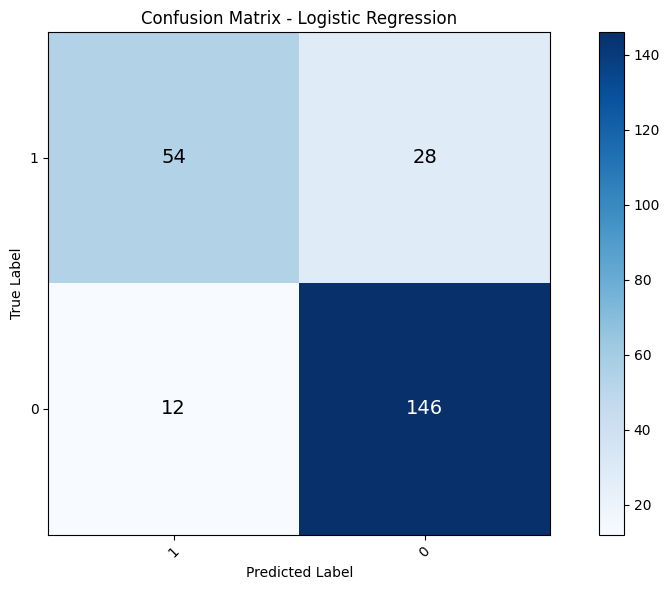

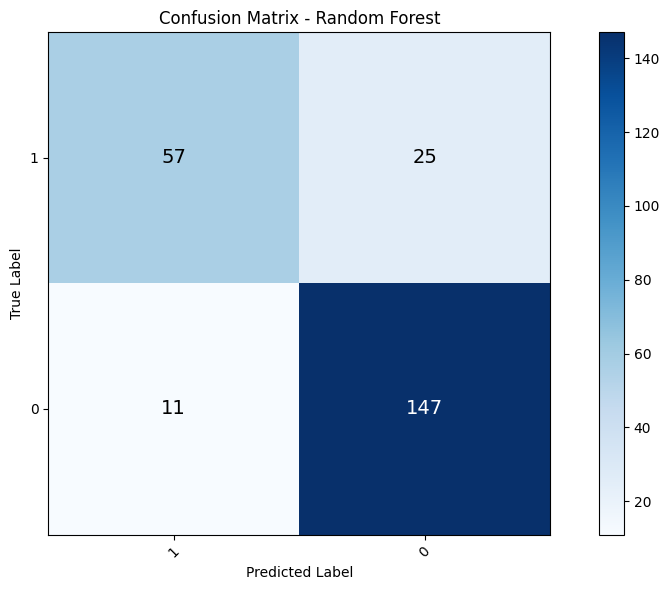

In [34]:
logistic_cm = confusion_matrix(y_test, logistic_model.predict(X_test))
random_forest_cm = confusion_matrix(y_test, random_forest_model.predict(X_test))

def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(10, 6))
    plt.imshow(cm, cmap="Blues")
    plt.colorbar()
    plt.title(f"Confusion Matrix - {model_name}")
    fontsize = 14
    fmt = 'd'
    thresh = cm.max() / 2.
    for i in range(len(cm)):
        for j in range(len(cm[0])):
            plt.text(j, i, format(cm[i, j], fmt),
                     ha="center", va="center",
                     fontsize=fontsize,
                     color="white" if cm[i, j] > thresh else "black")

    plt.xticks(range(len(y.unique())), y.unique(), rotation=45)
    plt.yticks(range(len(y.unique())), y.unique())
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.tight_layout()
    plt.show()


# Call the function to plot each confusion matrix
plot_confusion_matrix(logistic_cm, "Logistic Regression")
plot_confusion_matrix(random_forest_cm, "Random Forest")

In [35]:
svm_model = SVC()  # You can adjust hyperparameters here (e.g., kernel, C)
svm_model.fit(X_train, y_train)

# Evaluate the model
svm_accuracy = accuracy_score(y_test, svm_model.predict(X_test))
svm_precision = precision_score(y_test, svm_model.predict(X_test))
svm_recall = recall_score(y_test, svm_model.predict(X_test))
svm_f1 = f1_score(y_test, svm_model.predict(X_test))

print("SVM:")
print(f"Accuracy: {svm_accuracy:.4f}")
print(f"Precision: {svm_precision:.4f}")
print(f"Recall: {svm_recall:.4f}")
print(f"F1-score: {svm_f1:.4f}")

SVM:
Accuracy: 0.6583
Precision: 0.6712
Recall: 0.9430
F1-score: 0.7842


## Conclusion

Random Forest preformed well in terms of accuracy

Class imbalance was significant 

## Second Method:

Random forest was the highest precision and outpreformed the other 

Let's try XGBBoost as boosting algorithms in hopes of better performance

XGBBoost
Accuracy: 0.8375
Precision: 0.8650306748466258
Recall: 0.8924050632911392
F1-score: 0.8785046728971962


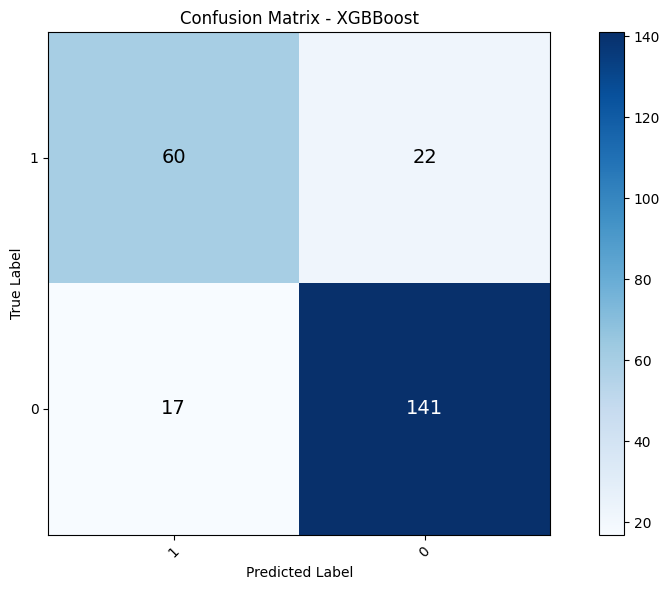

In [36]:
xgb_model=xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)
y_pred_prob = xgb_model.predict_proba(X_test)[:, 1]

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print('XGBBoost')
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

# Plot confusion matrix
plot_confusion_matrix(cm, 'XGBBoost')

## Post Hoc - Permutation Importance & Shap Values

A plotting of the shap values for random forest and XGBBoost

### Random Forest

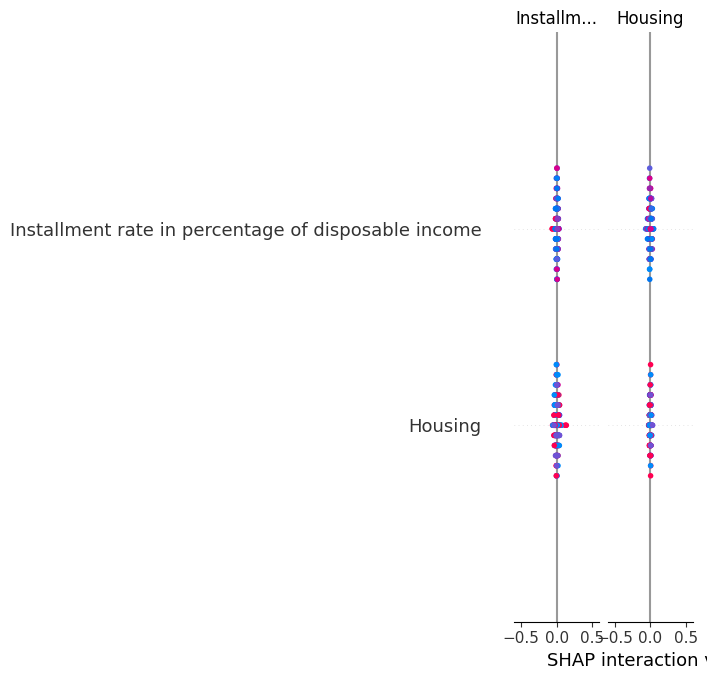

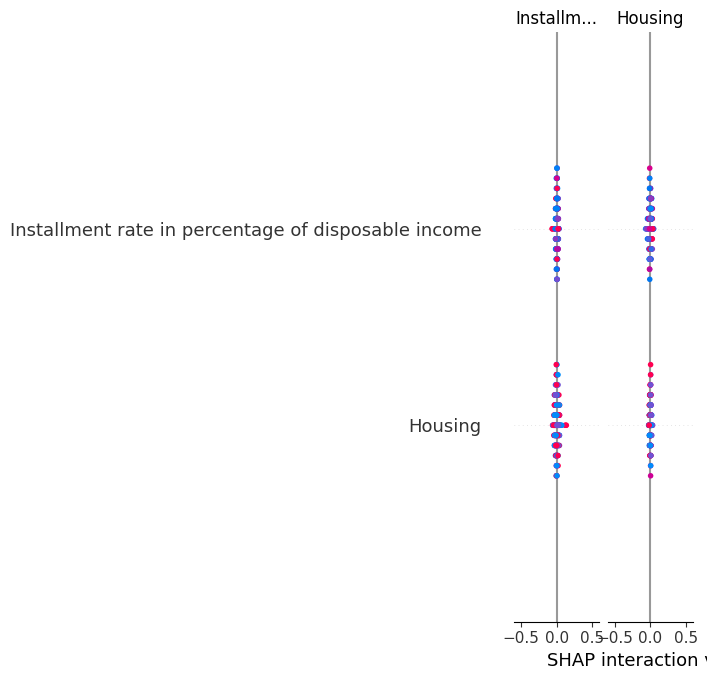

In [37]:
explainer_rf = shap.TreeExplainer(random_forest_model)
shap_values_rf = explainer_rf.shap_values(X_test)
shap.summary_plot(shap_values_rf, X_test, plot_type="bar")
shap.summary_plot(shap_values_rf, X_test)

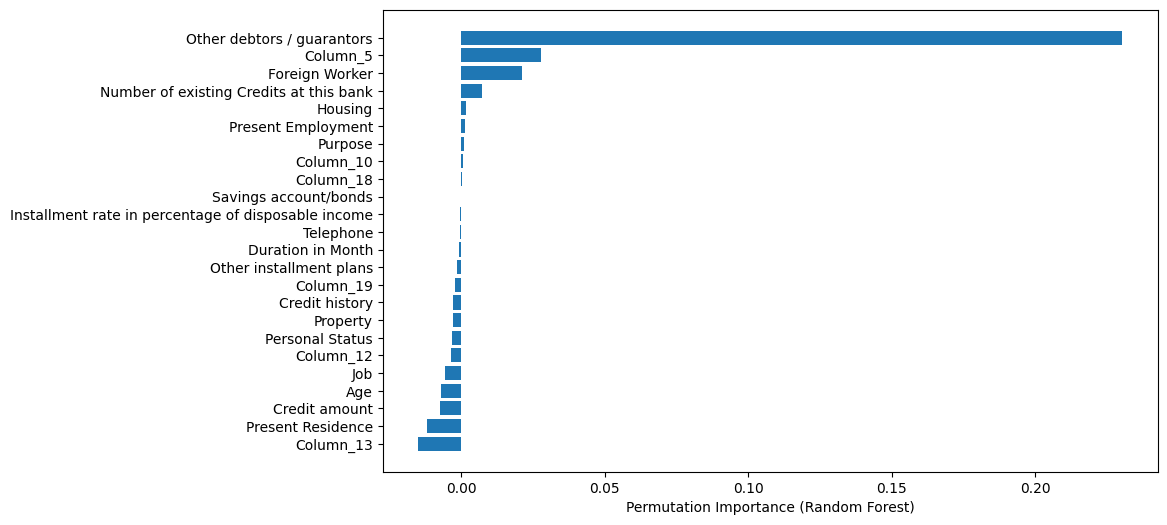

In [38]:
perm_importance_rf = permutation_importance(random_forest_model, X_test, y_test, n_repeats=30, random_state=42)
sorted_idx_rf = perm_importance_rf.importances_mean.argsort()


plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx_rf)), perm_importance_rf.importances_mean[sorted_idx_rf])
plt.yticks(range(len(sorted_idx_rf)), X_test.columns[sorted_idx_rf])
plt.xlabel("Permutation Importance (Random Forest)")
plt.show()

### XGBbboost

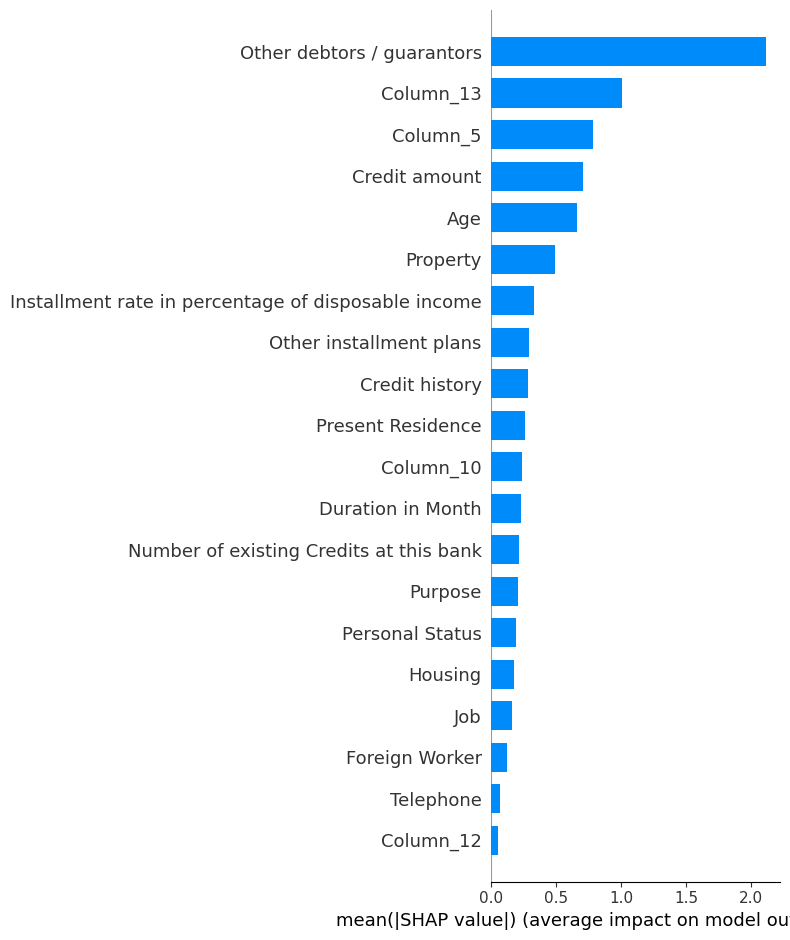

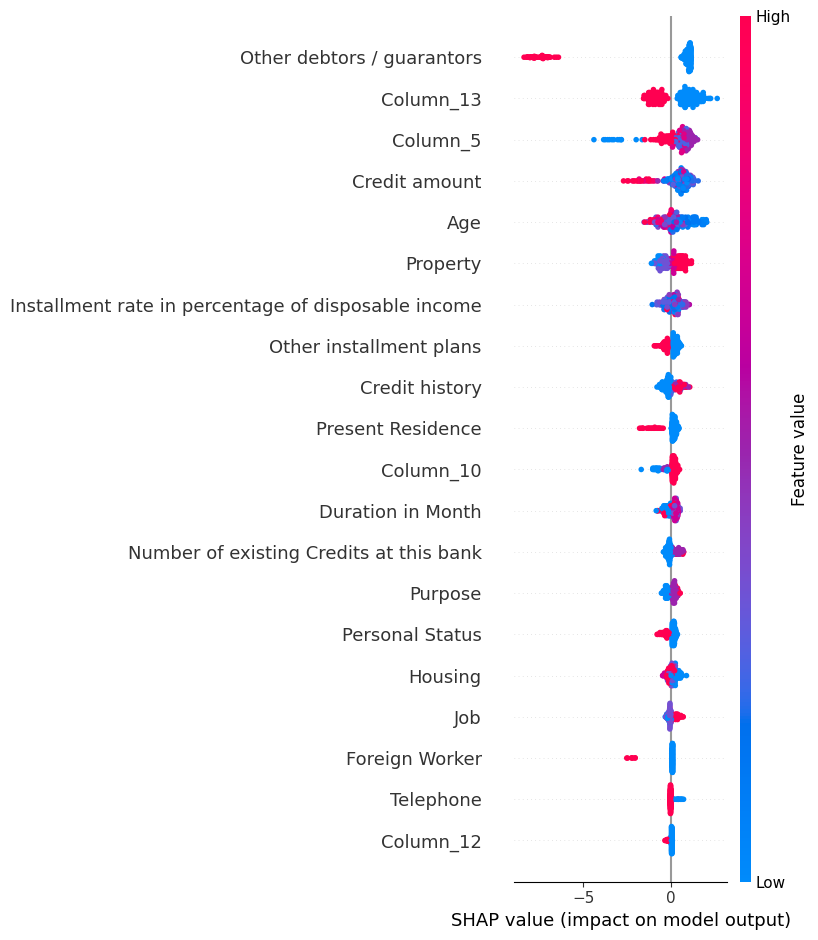

In [39]:
explainer_xgb = shap.TreeExplainer(xgb_model)
shap_values_xgb = explainer_xgb.shap_values(X_test)
shap.summary_plot(shap_values_xgb, X_test, plot_type="bar")
shap.summary_plot(shap_values_xgb, X_test)

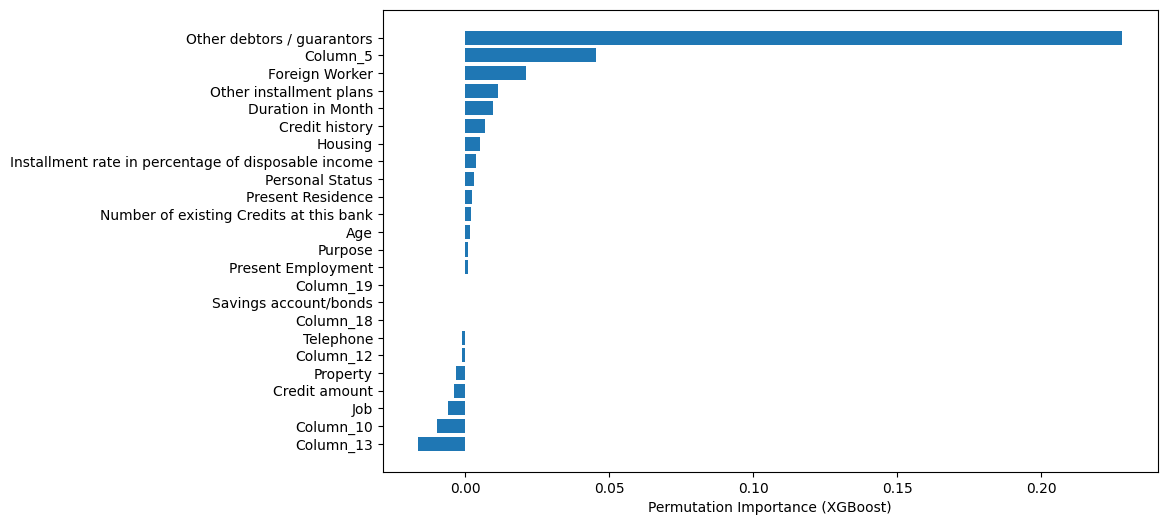

In [40]:
perm_importance_xgb = permutation_importance(xgb_model, X_test, y_test, n_repeats=30, random_state=42)
sorted_idx_xgb = perm_importance_xgb.importances_mean.argsort()

plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx_xgb)), perm_importance_xgb.importances_mean[sorted_idx_xgb])
plt.yticks(range(len(sorted_idx_xgb)), X_test.columns[sorted_idx_xgb])
plt.xlabel("Permutation Importance (XGBoost)")
plt.show()

#### Improvement - Trial

It seems for both models 'Other debtors/Guarantors', 'Column_5', 'Column_13', 'Foreign Worker' and 'Age' are main contributors for both random forest and XGBboost

Let's check the performance after removing negative feature that are causing noise

In [41]:
negative_features_rf = ['Housing', 'Other installment plans', 'Column_18']
negative_features_xgb = ['Credit history', 'Present Employment', 'Present Residence', 'Column_18']

Modified Random Forest Accuracy: 0.8458333333333333
Modified Random Forest Precision: 0.8622754491017964
Modified Random Forest Recall: 0.9113924050632911
Modified Random Forest F1-score: 0.8861538461538462


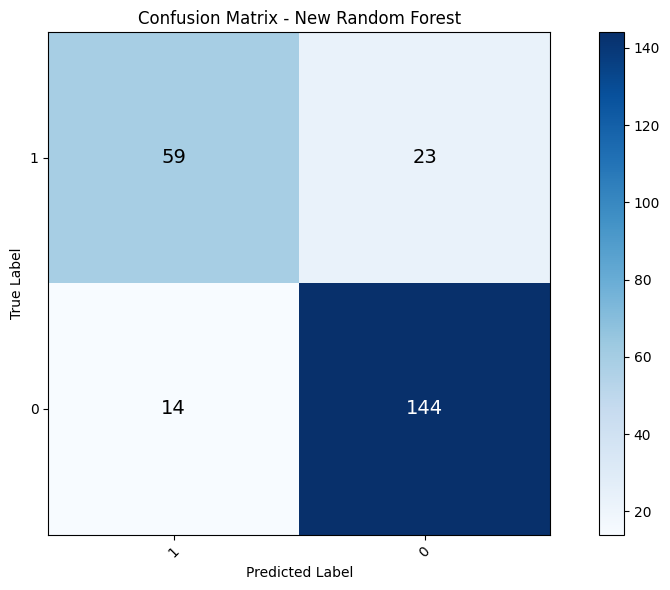

Modified XGBoost Accuracy: 0.85
Modified XGBoost Precision: 0.8765432098765432
Modified XGBoost Recall: 0.8987341772151899
Modified XGBoost F1-score: 0.8875


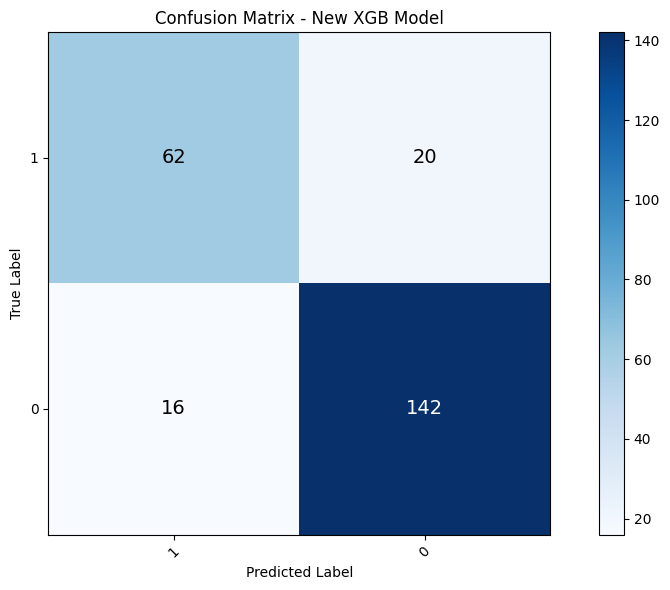

In [42]:
negative_features = list(set(negative_features_rf + negative_features_xgb))

X_train_mod = X_train.drop(columns=negative_features)
X_test_mod = X_test.drop(columns=negative_features)

# Retrain Random Forest
rf_model_mod = RandomForestClassifier()
rf_model_mod.fit(X_train_mod, y_train)

# Retrain XGBoost
xgb_model_mod = xgb.XGBClassifier()
xgb_model_mod.fit(X_train_mod, y_train)

# Evaluate the modified Random Forest
y_pred_rf_mod = rf_model_mod.predict(X_test_mod)
cm_rf_mod = confusion_matrix(y_test, y_pred_rf_mod)
print(f"Modified Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf_mod)}")
print(f"Modified Random Forest Precision: {precision_score(y_test, y_pred_rf_mod)}")
print(f"Modified Random Forest Recall: {recall_score(y_test, y_pred_rf_mod)}")
print(f"Modified Random Forest F1-score: {f1_score(y_test, y_pred_rf_mod)}")
plot_confusion_matrix(cm_rf_mod,'New Random Forest')

# Evaluate the modified XGBoost
y_pred_xgb_mod = xgb_model_mod.predict(X_test_mod)
cm_xgb_mod = confusion_matrix(y_test, y_pred_xgb_mod)
print(f"Modified XGBoost Accuracy: {accuracy_score(y_test, y_pred_xgb_mod)}")
print(f"Modified XGBoost Precision: {precision_score(y_test, y_pred_xgb_mod)}")
print(f"Modified XGBoost Recall: {recall_score(y_test, y_pred_xgb_mod)}")
print(f"Modified XGBoost F1-score: {f1_score(y_test, y_pred_xgb_mod)}")
plot_confusion_matrix(cm_xgb_mod, 'New XGB Model')

Performance slightly increased with a reduction in false positives 

#### Check for class Imbalances

Due to high true negatives one can assume there is an imbalance the cells do show high 1 annd lower 0, therefore we will analyse ROC AUC & Precision Recall Curve

ROC AUC - Original Random Forest: 0.8954924359370177
ROC AUC - Original XGBoost: 0.8858443964186478
ROC AUC - Modified Random Forest: 0.8996989811670268
ROC AUC - Modified XGBoost: 0.9043686322939178


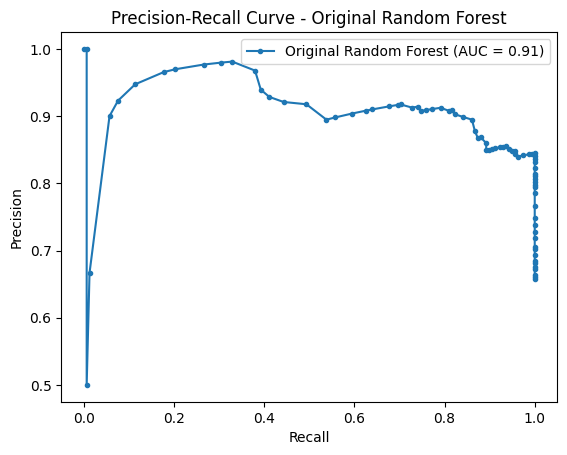

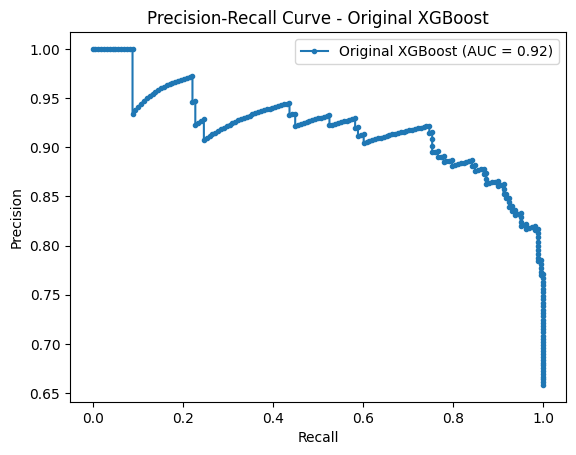

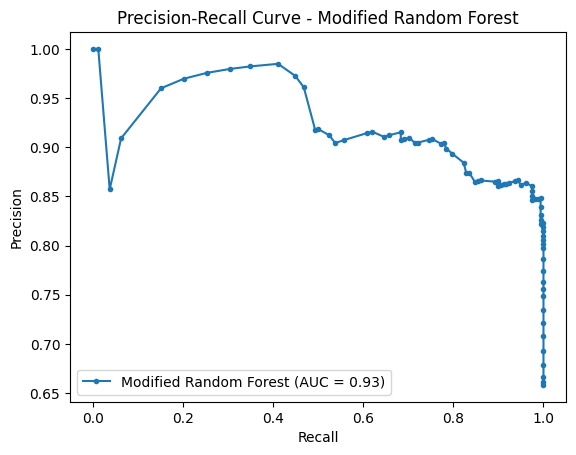

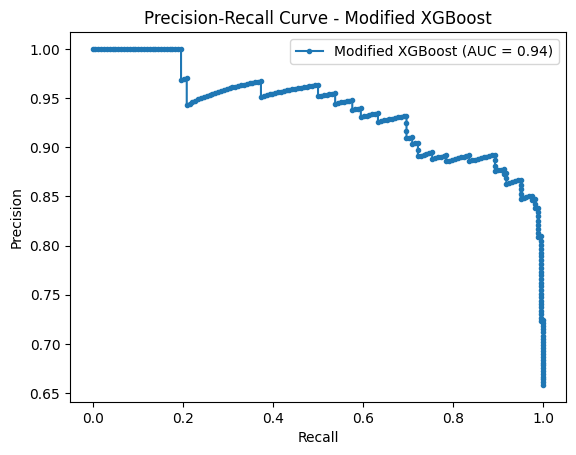

In [43]:
roc_auc_rf = roc_auc_score(y_test, random_forest_model.predict_proba(X_test)[:, 1])
roc_auc_xgb = roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1])
roc_auc_rf_mod = roc_auc_score(y_test, rf_model_mod.predict_proba(X_test_mod)[:, 1])
roc_auc_xgb_mod = roc_auc_score(y_test, xgb_model_mod.predict_proba(X_test_mod)[:, 1])

print(f"ROC AUC - Original Random Forest: {roc_auc_rf}")
print(f"ROC AUC - Original XGBoost: {roc_auc_xgb}")
print(f"ROC AUC - Modified Random Forest: {roc_auc_rf_mod}")
print(f"ROC AUC - Modified XGBoost: {roc_auc_xgb_mod}")

# Precision-Recall Curve
def plot_precision_recall_curve(model, X_test, y_test, model_name):
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
    pr_auc = auc(recall, precision)
    
    plt.plot(recall, precision, marker='.', label=f'{model_name} (AUC = {pr_auc:.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve - {model_name}')
    plt.legend()
    plt.show()

plot_precision_recall_curve(random_forest_model, X_test, y_test, 'Original Random Forest')
plot_precision_recall_curve(xgb_model, X_test, y_test, 'Original XGBoost')
plot_precision_recall_curve(rf_model_mod, X_test_mod, y_test, 'Modified Random Forest')
plot_precision_recall_curve(xgb_model_mod, X_test_mod, y_test, 'Modified XGBoost')

Models are showing high precision on low recall curves suggesting that there is class imbalance which is quite evident from the graph

## Conclusions and Perspectives:

There is clear indication of class imbalance and as conslusion the top features are other debtors/ guarantors, foreign worker, age and column_5

As recommendation resampling techniques can be done and further feature engineering